# P5: Segmentez des clients d'un site e-commerce
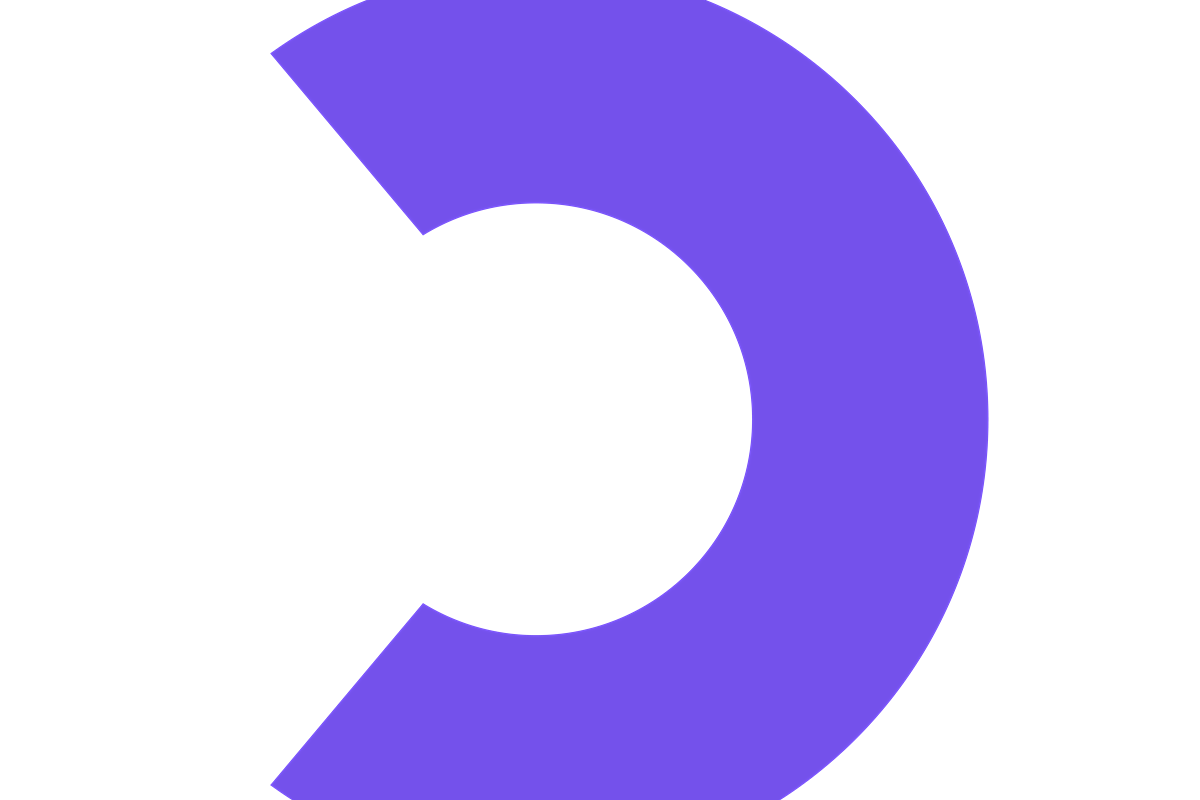

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from utils import *

# File system manangement
import os
import gc
import time

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import decomposition
from functions import *
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Instantiate the clustering model and visualizer 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['lines.linewidth'] = 2
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

# Load the clients dataset

In [2]:
df_clients = pd.read_csv('data/df_clients.csv')

In [3]:
df_clients.head()

,customer_unique_id,payment_type_LAMBDA,payment_value_SUM,payment_sequential_MAX,payment_installments_MAX,review_score_MAX,review_score_COUNT,price_SUM,freight_value_SUM,product_weight_g_MAX,...,product_width_cm_MAX,my_categoty_LAMBDA,customer_state_top10_LAMBDA,seller_state_top10_LAMBDA,geolocation_lat_MEAN,geolocation_lng_MEAN,diff_car_app_MAX,diff_del_car_MAX,diff_est_act_MAX,diff_cust_pur_MAX
0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card,141.90,1,8,5,1,129.90,12.00,1500.0,...,32.0,home_layout,SP,SP,-23.335331,-46.828647,2,4,5,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card,27.19,1,1,4,1,18.90,8.29,375.0,...,18.0,personal_care,SP,SP,-23.567395,-46.792957,2,1,5,115
2,0000f46a3911fa3c0805444483337064,credit_card,86.22,1,8,3,1,69.00,17.22,1500.0,...,35.0,electronics,SC,SP,-27.543787,-48.625680,3,23,2,538
3,0000f6ccb0745a6a4b88665a16c9f078,credit_card,43.62,1,4,4,1,25.99,17.63,150.0,...,11.0,electronics,Other,SP,-1.311011,-48.482884,1,19,12,322
4,0004aac84e0df4da2b147fca70cf8255,credit_card,196.89,1,6,5,1,180.00,16.89,6050.0,...,11.0,electronics,SP,SP,-23.504368,-47.466156,2,11,8,289


In [4]:
df_clients.shape

(76012, 22)

In [5]:
df_clients.describe(include=[object])

,customer_unique_id,payment_type_LAMBDA,my_categoty_LAMBDA,customer_state_top10_LAMBDA,seller_state_top10_LAMBDA
count,76012,76012,76012,76012,76012
unique,76012,4,13,11,11
top,0000366f3b9a7992bf8c76cfdf3221e2,credit_card,dressing,SP,SP
freq,1,60962,16639,31771,53685


## Deleting the customer id column

In [6]:
df_clients = df_clients.drop(["customer_unique_id"], axis=1)

## Encoding categorical variables

In [7]:
df_clients_encoded, new_columns = encode_categorical_variables(df_clients, nan_as_category = True)

In [8]:
df_clients_encoded.shape
df_clients.shape

(76012, 60)

(76012, 21)

In [9]:
df_clients_encoded_corr = df_clients_encoded.corr()

In [10]:
df_clients_encoded = remove_columns_regarding_correlation(df_clients_encoded, df_clients_encoded_corr, hdc_make=False, hc_make=True)

In [11]:
df_clients_encoded.shape

(76012, 60)

In [12]:
df_clients_encoded.head()

,payment_value_SUM,payment_sequential_MAX,payment_installments_MAX,review_score_MAX,review_score_COUNT,price_SUM,freight_value_SUM,product_weight_g_MAX,product_length_cm_MAX,product_height_cm_MAX,...,seller_state_top10_LAMBDA_ES,seller_state_top10_LAMBDA_GO,seller_state_top10_LAMBDA_MG,seller_state_top10_LAMBDA_Other,seller_state_top10_LAMBDA_PR,seller_state_top10_LAMBDA_RJ,seller_state_top10_LAMBDA_RS,seller_state_top10_LAMBDA_SC,seller_state_top10_LAMBDA_SP,seller_state_top10_LAMBDA_nan
0,141.90,1,8,5,1,129.90,12.00,1500.0,34.0,7.0,...,0,0,0,0,0,0,0,0,1,0
1,27.19,1,1,4,1,18.90,8.29,375.0,26.0,11.0,...,0,0,0,0,0,0,0,0,1,0
2,86.22,1,8,3,1,69.00,17.22,1500.0,25.0,50.0,...,0,0,0,0,0,0,0,0,1,0
3,43.62,1,4,4,1,25.99,17.63,150.0,19.0,5.0,...,0,0,0,0,0,0,0,0,1,0
4,196.89,1,6,5,1,180.00,16.89,6050.0,16.0,3.0,...,0,0,0,0,0,0,0,0,1,0


## Normalization dataset

In [13]:
# Dropping the categorical data and use just the numerical data
df_clients = df_clients.drop(["payment_type_LAMBDA", "my_categoty_LAMBDA", "customer_state_top10_LAMBDA", "seller_state_top10_LAMBDA"], axis=1)
std_scale = preprocessing.StandardScaler().fit(df_clients)
df_clients = pd.DataFrame(std_scale.transform(df_clients), columns=df_clients.columns)

In [14]:
df_clients.head()

,payment_value_SUM,payment_sequential_MAX,payment_installments_MAX,review_score_MAX,review_score_COUNT,price_SUM,freight_value_SUM,product_weight_g_MAX,product_length_cm_MAX,product_height_cm_MAX,product_width_cm_MAX,geolocation_lat_MEAN,geolocation_lng_MEAN,diff_car_app_MAX,diff_del_car_MAX,diff_est_act_MAX,diff_cust_pur_MAX
0,-0.130738,-0.098558,1.796132,0.661571,-0.222164,-0.028496,-0.539430,-0.187493,0.199733,-0.729749,0.711237,-0.382479,-0.163124,-0.354498,-0.615467,-0.652055,-0.876304
1,-0.566180,-0.098558,-0.740518,-0.111771,-0.222164,-0.586561,-0.741991,-0.475078,-0.287475,-0.435635,-0.455341,-0.423736,-0.154371,-0.354498,-0.952450,-0.652055,-0.856351
2,-0.342101,-0.098558,1.796132,-0.885113,-0.222164,-0.334678,-0.254425,-0.187493,-0.348376,2.431975,0.961219,-1.130685,-0.603814,-0.063538,1.518758,-0.946031,1.957137
3,-0.503812,-0.098558,0.346618,-0.111771,-0.222164,-0.550915,-0.232040,-0.532595,-0.713782,-0.876805,-1.038630,3.533149,-0.568796,-0.645457,1.069447,0.033890,0.520462
4,0.078005,-0.098558,1.071375,0.661571,-0.222164,0.223387,-0.272443,0.975629,-0.896485,-1.023862,-1.038630,-0.412531,-0.319461,-0.354498,0.170826,-0.358079,0.300970


In [15]:
std_scale = preprocessing.StandardScaler().fit(df_clients_encoded)
df_clients_encoded = pd.DataFrame(std_scale.transform(df_clients_encoded), columns=df_clients_encoded.columns)

In [16]:
df_clients_encoded.head()

,payment_value_SUM,payment_sequential_MAX,payment_installments_MAX,review_score_MAX,review_score_COUNT,price_SUM,freight_value_SUM,product_weight_g_MAX,product_length_cm_MAX,product_height_cm_MAX,...,seller_state_top10_LAMBDA_ES,seller_state_top10_LAMBDA_GO,seller_state_top10_LAMBDA_MG,seller_state_top10_LAMBDA_Other,seller_state_top10_LAMBDA_PR,seller_state_top10_LAMBDA_RJ,seller_state_top10_LAMBDA_RS,seller_state_top10_LAMBDA_SC,seller_state_top10_LAMBDA_SP,seller_state_top10_LAMBDA_nan
0,-0.130738,-0.098558,1.796132,0.661571,-0.222164,-0.028496,-0.539430,-0.187493,0.199733,-0.729749,...,-0.057329,-0.067129,-0.29195,-0.110015,-0.294384,-0.213205,-0.143037,-0.197333,0.644895,0.0
1,-0.566180,-0.098558,-0.740518,-0.111771,-0.222164,-0.586561,-0.741991,-0.475078,-0.287475,-0.435635,...,-0.057329,-0.067129,-0.29195,-0.110015,-0.294384,-0.213205,-0.143037,-0.197333,0.644895,0.0
2,-0.342101,-0.098558,1.796132,-0.885113,-0.222164,-0.334678,-0.254425,-0.187493,-0.348376,2.431975,...,-0.057329,-0.067129,-0.29195,-0.110015,-0.294384,-0.213205,-0.143037,-0.197333,0.644895,0.0
3,-0.503812,-0.098558,0.346618,-0.111771,-0.222164,-0.550915,-0.232040,-0.532595,-0.713782,-0.876805,...,-0.057329,-0.067129,-0.29195,-0.110015,-0.294384,-0.213205,-0.143037,-0.197333,0.644895,0.0
4,0.078005,-0.098558,1.071375,0.661571,-0.222164,0.223387,-0.272443,0.975629,-0.896485,-1.023862,...,-0.057329,-0.067129,-0.29195,-0.110015,-0.294384,-0.213205,-0.143037,-0.197333,0.644895,0.0


## Reduce data

We will reduce our data for testing the models in a more faster way. When the model will be selected we will apply it on the whole dataset.

In [17]:
df_clients_reduced = df_clients.sample(10000, random_state=10).copy()
df_clients_encoded_reduced = df_clients_encoded.sample(10000, random_state=10).copy()

In [18]:
is_reduced = False
is_encoded = True

if is_reduced:
    if is_encoded:
        df = df_clients_encoded_reduced
    else:
        df = df_clients_reduced
else:
    if is_encoded:
        df = df_clients_encoded
    else:
        df = df_clients

# Dimension reduction

In [19]:
pca = PCA(random_state=10)

In [20]:
pca.fit(df)

PCA(random_state=10)

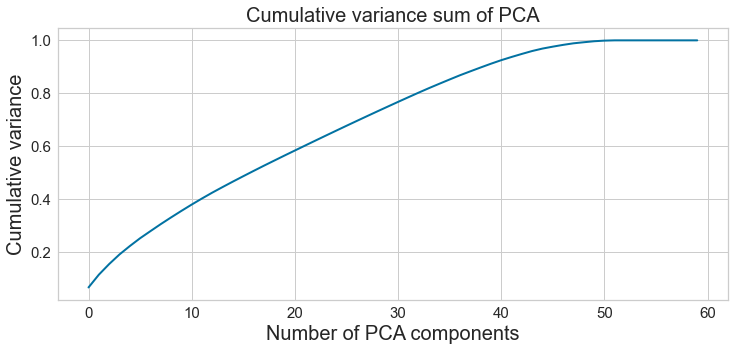

In [21]:
plt.figure(figsize=(12,5));
plt.title('Cumulative variance sum of PCA');
plt.xlabel('Number of PCA components');
plt.ylabel('Cumulative variance');
plt.plot(list(range(df.shape[1])),
    np.cumsum(pca.explained_variance_ratio_), '-x');

In [22]:
np.cumsum(pca.explained_variance_ratio_)[43]

0.9597661048893784

In [23]:
pca.fit(df)

PCA(random_state=10)

In [24]:
n_comp = 43

In [25]:
colonnes_pca = df.columns

In [26]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(df)

X_projected = pca.fit_transform(df)


X_projected = pd.DataFrame(X_projected, index = df.index, columns = ['F{0}'.format(i) for i in range(n_comp)])

X_projected

PCA(n_components=43)

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42
0,-0.109184,-1.334702,-0.701589,-2.039284,-0.488087,0.169976,0.421779,-0.358958,1.258174,0.785322,...,0.468982,-0.053567,-0.324297,-0.286394,-0.448284,0.198821,0.396059,0.640984,-1.100985,0.216167
1,-2.037961,-0.547806,-0.597704,-1.013048,-0.322952,1.167883,-0.193654,0.874962,-0.283815,0.097222,...,0.001324,-0.651085,0.054036,0.039430,-0.392261,-1.502899,-0.059877,-0.277938,0.694143,-0.489445
2,0.731740,-0.579902,0.037170,-0.812067,3.080969,-0.303345,0.197020,-0.406071,-0.672290,0.712241,...,-0.249739,0.555802,0.345428,-0.160619,-0.488483,0.931967,-1.494482,-0.807950,0.298000,1.203869
3,-0.822914,3.985939,-0.260308,-0.556586,-0.219541,0.800888,-0.091363,-2.481854,-0.984553,1.801073,...,-0.105705,-0.005692,-0.438631,0.456847,-0.602894,0.623354,-0.501304,-0.319774,-0.194341,-0.128065
4,-0.846244,-0.272213,-1.004642,-0.407797,0.257130,1.242541,-0.208051,0.237889,0.414840,1.655838,...,-0.049478,-0.095936,-0.306088,0.348227,-1.286952,0.668276,-1.027857,0.354552,-0.251801,0.123317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76007,25.238081,2.472652,-1.319749,5.922896,-2.303124,8.499032,1.390088,-0.903811,1.390756,-0.220444,...,0.765107,-1.078606,-1.514166,1.190073,-2.581997,-2.023698,-0.401211,0.609105,5.340488,2.612462
76008,1.025699,2.673426,1.214171,-1.990743,-0.018159,-0.674133,-0.849386,1.351528,-0.629376,0.001072,...,0.584564,0.023109,-0.100899,-0.293620,0.178072,0.307299,1.432086,1.191313,0.974514,0.864674
76009,-0.173499,1.827900,-1.018705,1.609979,-1.092516,-1.293698,-0.441111,-2.827917,-1.858362,1.092771,...,-2.092467,1.510502,-0.009738,-1.480762,0.228648,-0.502768,0.327188,-0.454441,-0.892709,1.171522
76010,-0.665782,1.309894,-0.972469,-0.950643,-0.538470,0.247163,0.409251,0.898572,0.479050,-1.719286,...,0.050838,-0.267377,-0.037181,-0.053709,-0.172028,-0.251245,0.193300,-0.004853,-0.454499,-0.003158


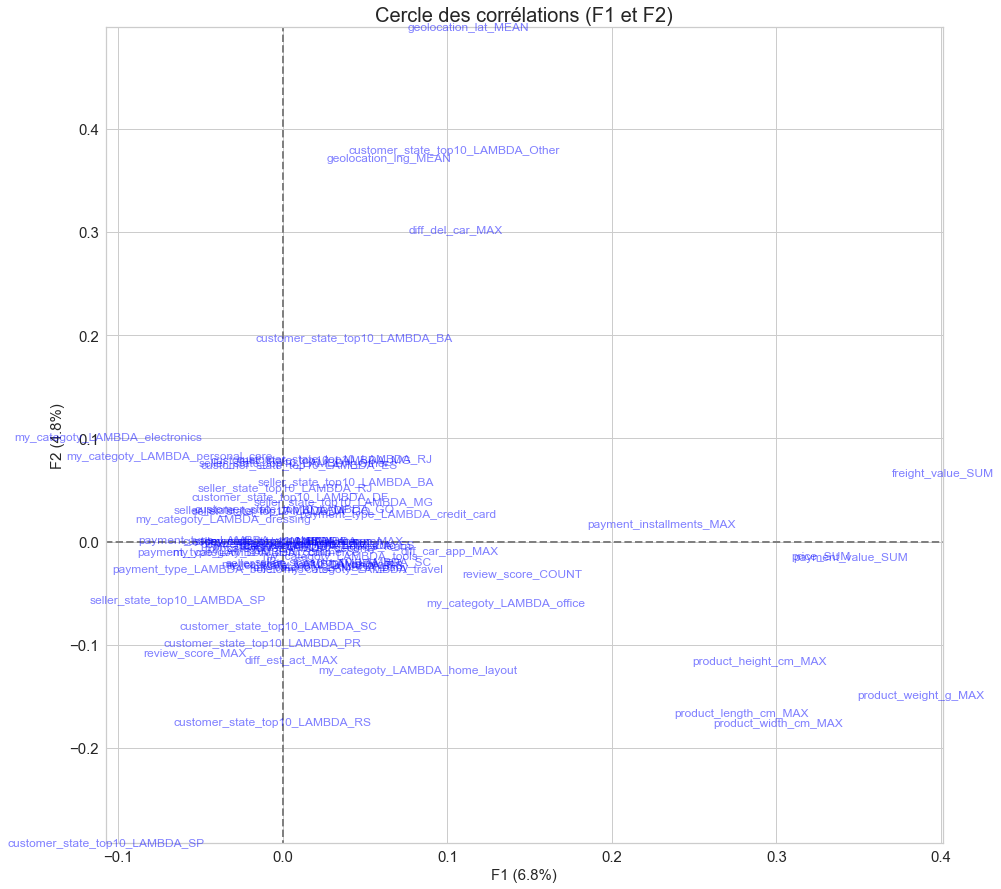

In [29]:
features = df.columns
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

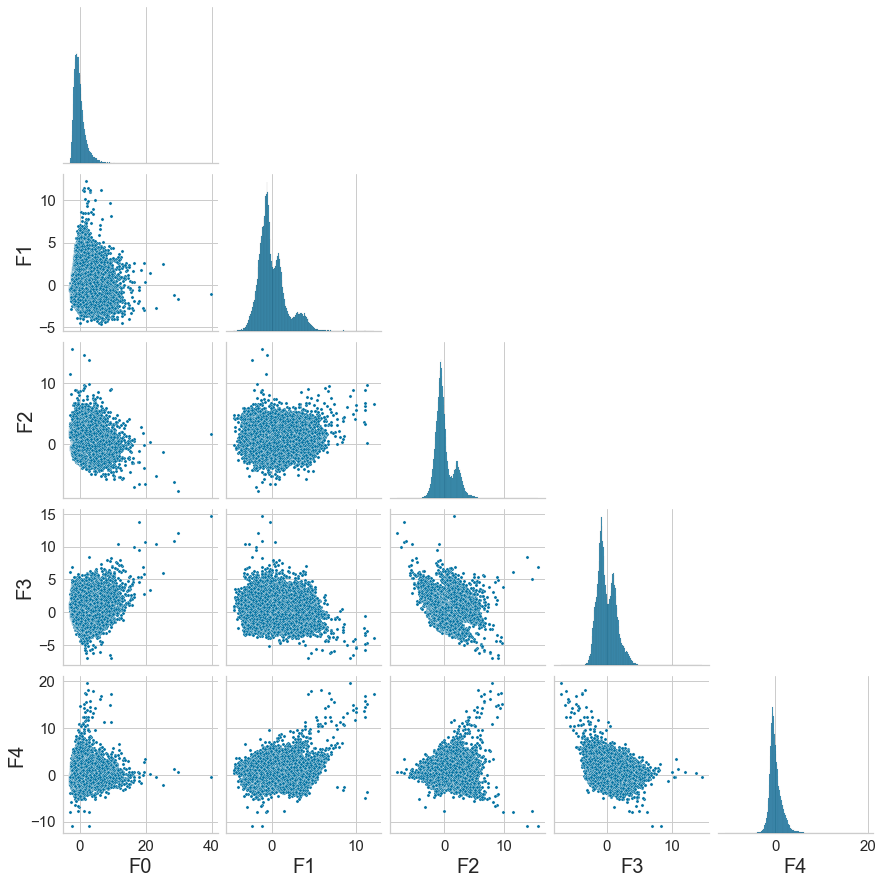

In [30]:
N = 5
sns.pairplot(X_projected.iloc[: , :N], plot_kws = {'s': 10}, corner=True)

In [61]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_projected.copy())
T = pd.DataFrame(T, columns=['T1', 'T2'])

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


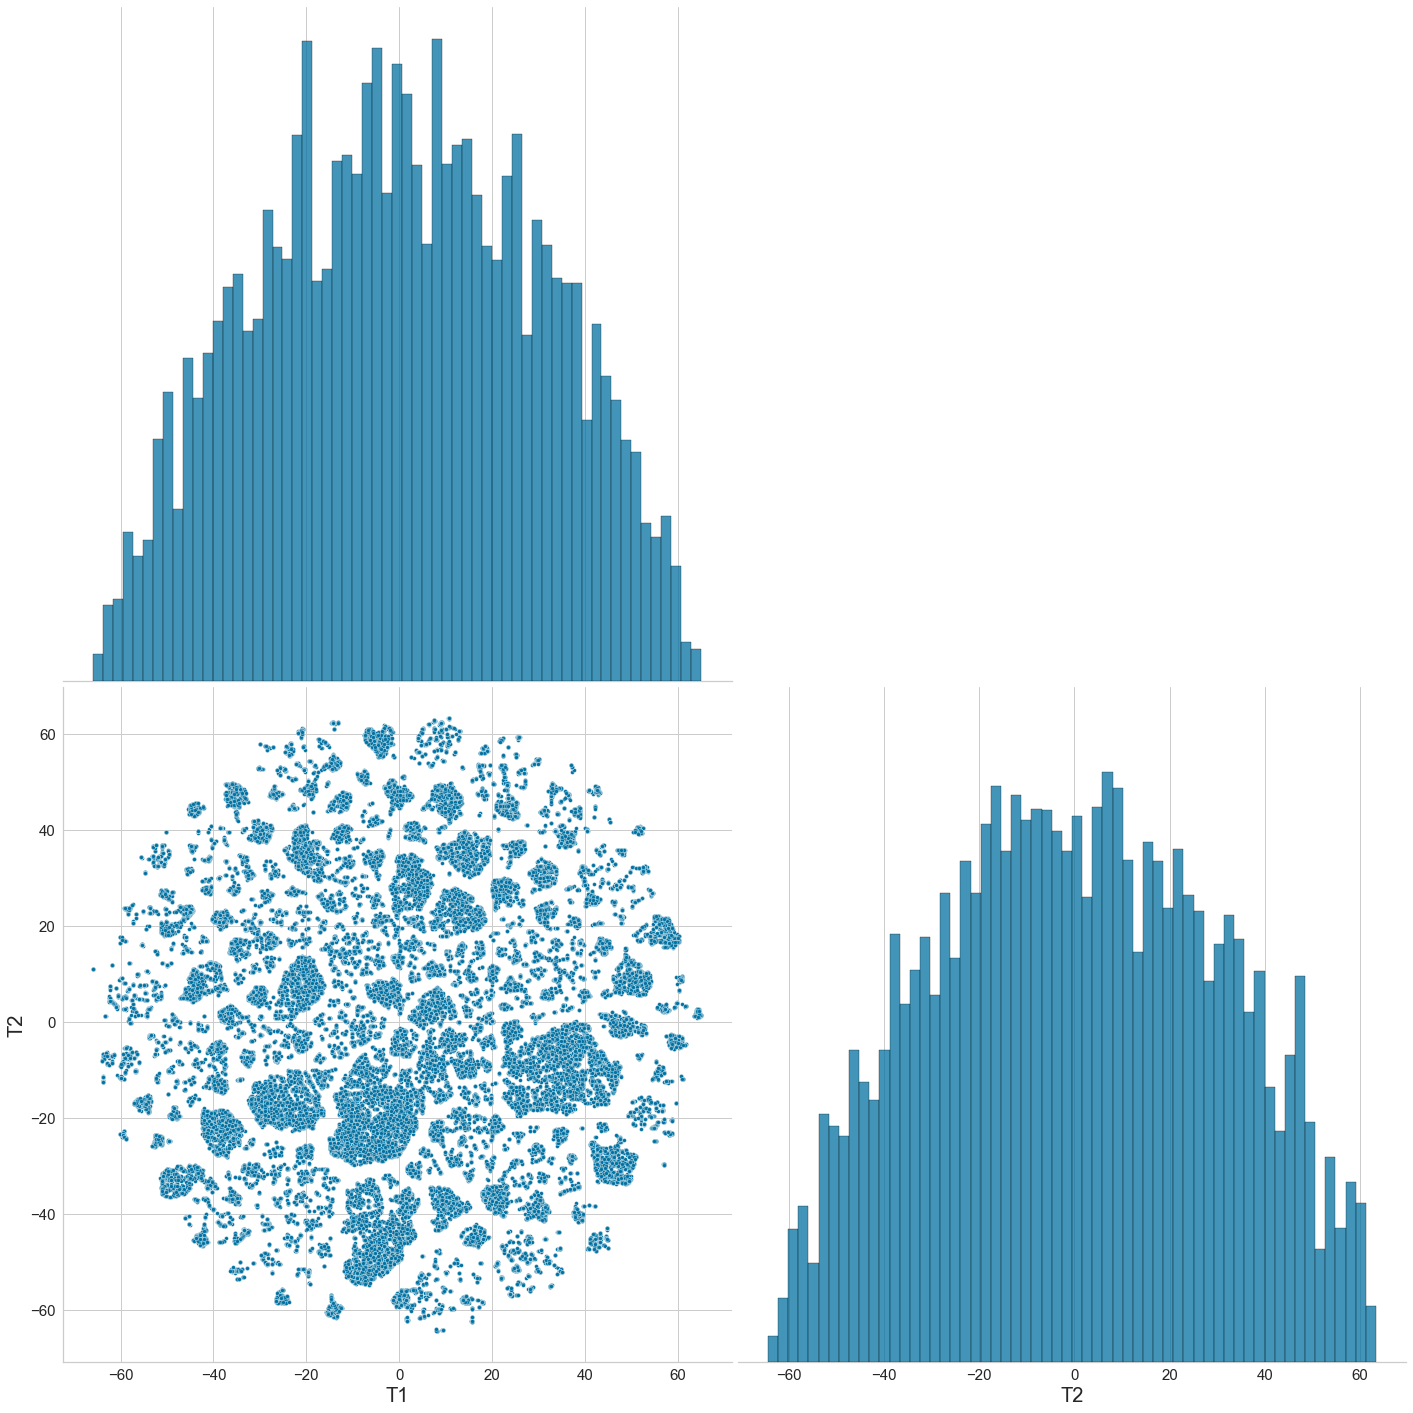

In [64]:
sns.pairplot(T, plot_kws = {'s': 15}, size=10, corner=True)

# Selecting the optimal number of clusters

In [67]:
# BIC for GMM
from sklearn.mixture import GaussianMixture
n_components = range(2, 20);
covariance_type = ['full', 'spherical', 'tied', 'diag', 'full']
score=[];

for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp, covariance_type=cov);
        gmm.fit(X_projected);
        score.append((cov,n_comp,gmm.bic(X_projected),gmm.aic(X_projected)));

score = pd.DataFrame(score, columns = ['cov_type', 'k', 'bic', 'aic']);

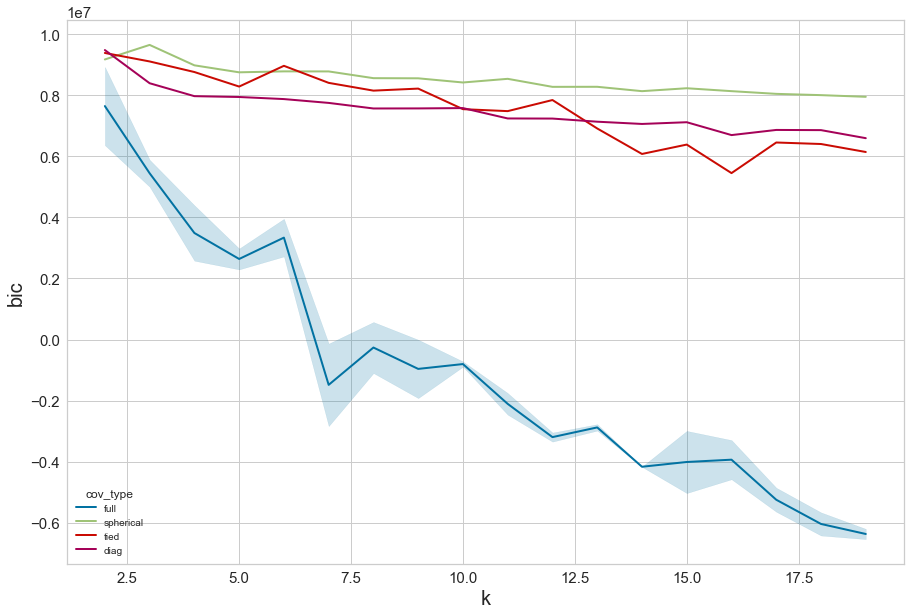

In [68]:
sns.lineplot(x="k", y="bic",
             hue="cov_type",
             data=score);

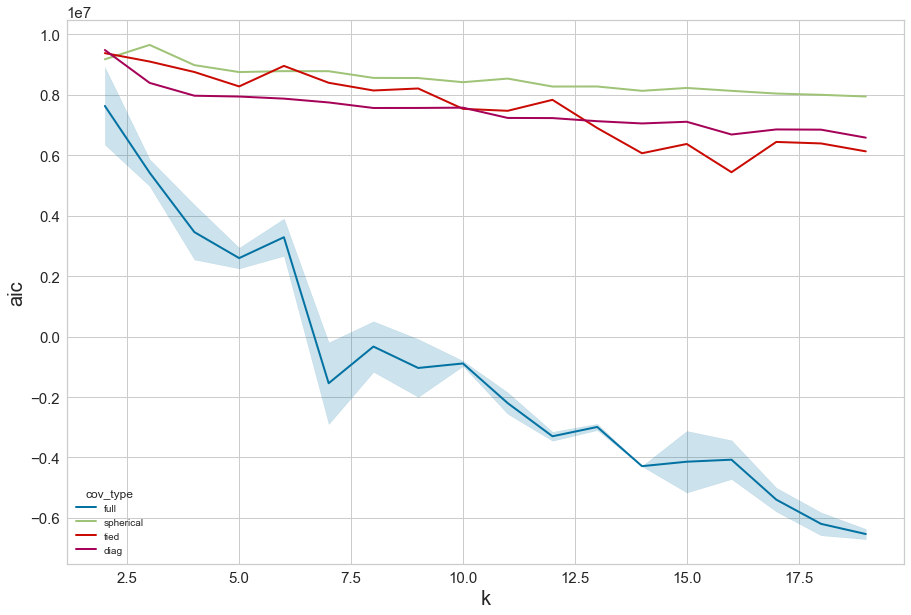

In [69]:
sns.lineplot(x="k", y="aic",
             hue="cov_type",
             data=score);

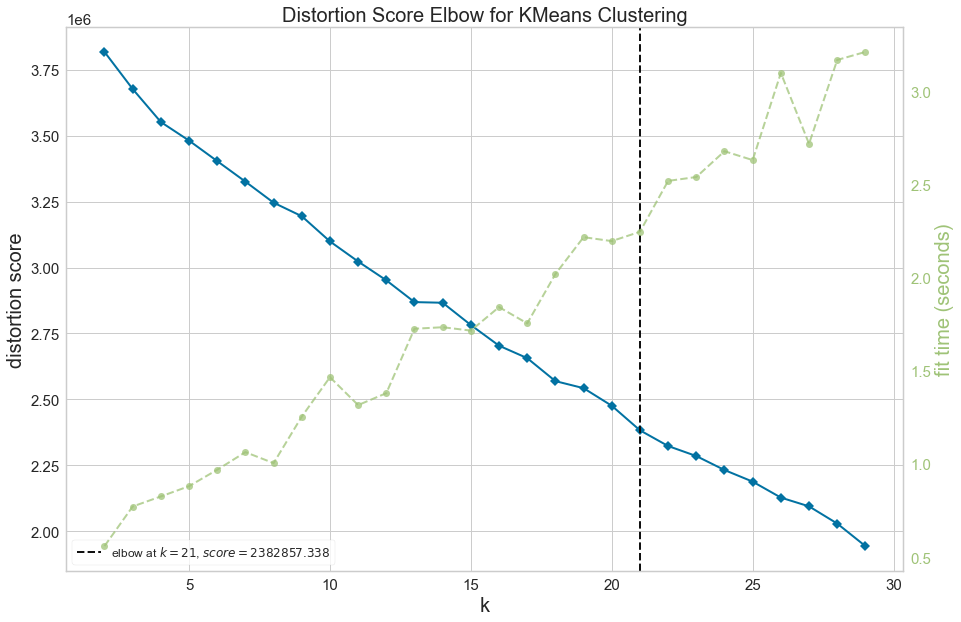

In [84]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30))

vis = visualizer.fit(X_projected);    # Fit the data to the visualizer

visualizer.poof();    # Draw/show/poof the data

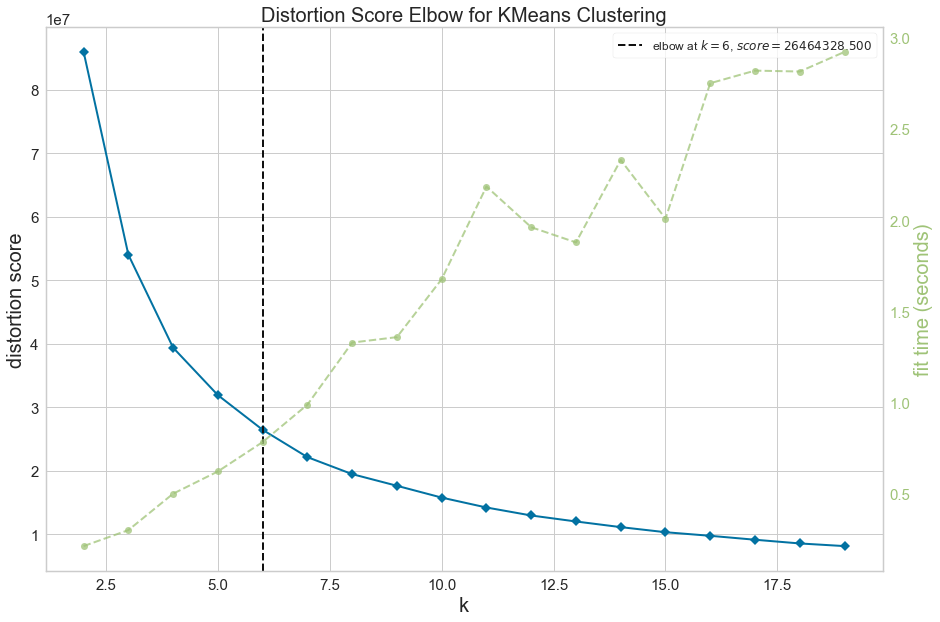

In [71]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

vis = visualizer.fit(T);    # Fit the data to the visualizer

visualizer.poof();    # Draw/show/poof the data

In [72]:
# Instantiate the clustering model and visualizer 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=True)

vis = visualizer.fit(X_projected)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

KeyboardInterrupt: 

In [ ]:
# Instantiate the clustering model and visualizer 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=True)

vis = visualizer.fit(T)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz')

vis = visualizer.fit(X_projected);    # Fit the data to the visualizer

visualizer.poof();    # Draw/show/poof the data

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz')

vis = visualizer.fit(T);    # Fit the data to the visualizer

visualizer.poof();    # Draw/show/poof the data

In [59]:
#import scipy.cluster.hierarchy as shc
#from matplotlib import pyplot
#pyplot.figure(figsize=(15,10))  
#pyplot.title("Dendrograms")  
#dend = shc.dendrogram(shc.linkage(X_projected, method='ward'))

Due to theese analysis a choise of 8 clusters is made. Next We can see a silhuete vizualizer.

# Applying unsupervised learning methods on our dataset.

In [148]:
kmeans = KMeans(n_clusters=6,
                random_state=10).fit(T[['T1', 'T2']])
T['k_means_labels'] = kmeans.labels_

<AxesSubplot:xlabel='T1', ylabel='T2'>

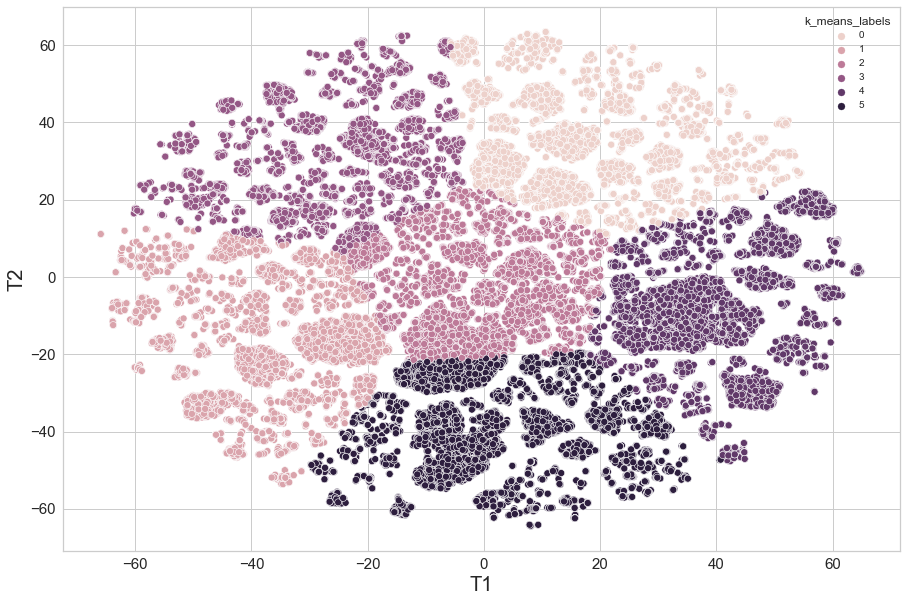

In [150]:
sns.scatterplot(data=T, x="T1", y="T2", hue="k_means_labels")

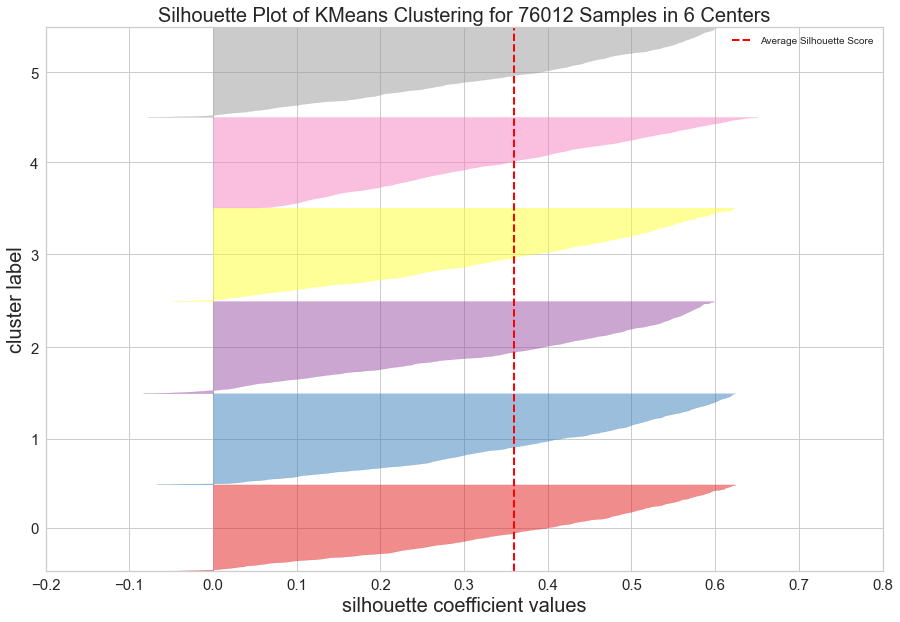

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 76012 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [90]:
# Instantiate the clustering model and visualizer 
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)

vis = visualizer.fit(T[['T1', 'T2']])    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [155]:
dbs = DBSCAN(eps = 1, min_samples=100).fit(T[['T1', 'T2']])
T['dbs_labels'] = dbs.labels_

In [156]:
len(np.unique(dbs.labels_))

69

<AxesSubplot:xlabel='T1', ylabel='T2'>

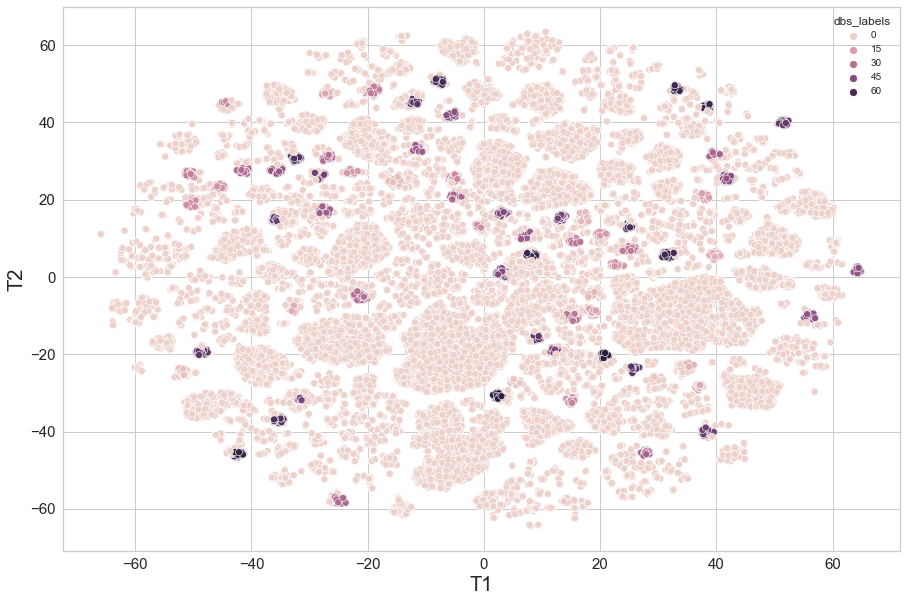

In [158]:
sns.scatterplot(data=T, x="T1", y="T2", hue="dbs_labels")

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cah = AgglomerativeClustering(n_clusters = 6).fit(T[['T1', 'T2']])
T['cah_labels'] = cah.labels_

In [ ]:
sns.scatterplot(data=T, x="T1", y="T2", hue="cah_labels")